In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('ggplot')
# load the data
df= pd.read_csv("iris.data", sep=',', header=None,
names = ['SepalLength','SepalWidth','PetalLength','PetalWidth','Class'])

print(df.head(3))
y=df['Class'];
y.unique()

   SepalLength  SepalWidth  PetalLength  PetalWidth        Class
0          5.1         3.5          1.4         0.2  Iris-setosa
1          4.9         3.0          1.4         0.2  Iris-setosa
2          4.7         3.2          1.3         0.2  Iris-setosa


array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [8]:
ordered=['Iris-setosa','Iris-versicolor','Iris-virginica']
y=y.astype("category",ordered=True,categories=ordered).cat.codes
df['Class']=y

/home/nik/Downloads/yes/lib/python2.7/site-packages/ipykernel/__main__.py:2: FutureWarning: specifying 'categories' or 'ordered' in .astype() is deprecated; pass a CategoricalDtype instead
  from ipykernel import kernelapp as app


In [9]:
y.head()

0    0
1    0
2    0
3    0
4    0
dtype: int8

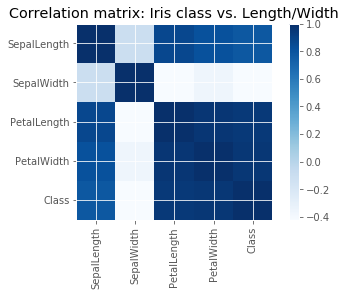

In [10]:
# Plot the correlation matrix: how features are correlated with each other
fig = plt.figure()
ax = fig.add_subplot(111)
fig.subplots_adjust(bottom=0.2)
ax.set_title('Correlation matrix: Iris class vs. Length/Width')
# Compute the correlation matrix of your dataframe
df.corr()
plt.imshow(df.corr(), cmap=plt.cm.Blues, interpolation='nearest')
plt.colorbar()
tick_marks = [i for i in range(len(df.columns))]
plt.xticks(tick_marks, df.columns, rotation='vertical')
plt.yticks(tick_marks, df.columns)
plt.show()

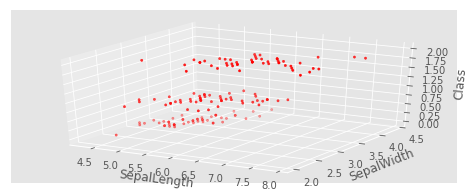

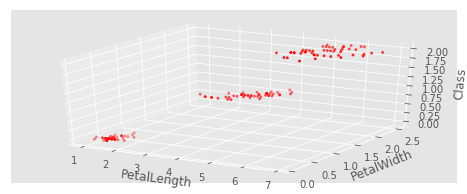

In [11]:
# The sepal length and width do not significantly separate clusters as classes
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
fig = plt.figure(figsize=plt.figaspect(1.5))
fig.set_size_inches(8,7)

ax = fig.add_subplot(2,1,1,projection='3d')
ax.set_xlabel('SepalLength')
ax.set_ylabel('SepalWidth')
ax.set_zlabel('Class')
ax.scatter(df.SepalLength, df.SepalWidth, df.Class, c='r', marker='.')
plt.show()
# The petal length and width do separate clusters
fig = plt.figure(figsize=plt.figaspect(1.5))
fig.set_size_inches(8,7)
ax = fig.add_subplot(2,1,2, projection='3d')
ax.set_xlabel('PetalLength')
ax.set_ylabel('PetalWidth')
ax.set_zlabel('Class')
ax.scatter(df.PetalLength, df.PetalWidth, df.Class, c='r', marker='.')
plt.show()

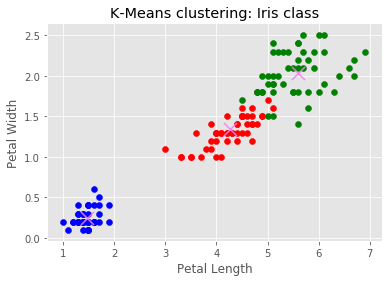

In [17]:
# Main function
from sklearn.cluster import KMeans
def doKMeans(df): # note the spacing below the function definition
    fig = plt.figure()
    ax = fig.add_subplot(111)
    df1 = df.loc[:,['PetalLength','PetalWidth']] # Filter Petal Length and Petal Width
    # Plot 3 sets of data for each class: Setosa-blue, Versicolor-red and Virginica-green.
    ax.scatter(df1.PetalLength[df.Class == 'Iris-setosa'], df1.PetalWidth[df.Class == 'Iris-setosa'], marker='o', c = 'blue')
    ax.scatter(df1.PetalLength[df.Class == 'Iris-versicolor'], df1.PetalWidth[df.Class == 'Iris-versicolor'], marker='o', c = 'red')
    ax.scatter(df1.PetalLength[df.Class == 'Iris-virginica'], df1.PetalWidth[df.Class == 'Iris-virginica'], marker='o', c = 'green')
    ax.set_title('K-Means clustering: Iris class')
    ax.set_xlabel('Petal Length')
    ax.set_ylabel('Petal Width')
    kmeans = KMeans(n_clusters=3) # run k-means with 3 clusters
    kmeans.fit(df1)
    centroids = kmeans.cluster_centers_ # Plot the centroids...
    ax.scatter(centroids[:,0], centroids[:,1], marker='x', c='violet', alpha=0.9, linewidths=5, s=169)
# Load your dataset
df= pd.read_csv("iris.data", sep=',', header=None,
names = ['SepalLength','SepalWidth','PetalLength','PetalWidth','Class'])
# Drop any ROWs with nans in them
df.dropna(axis = 0)
df = df.reset_index(drop=True)
df.shape
# Call the function, Plot your data
doKMeans(df)
plt.show()